## Waste Classification using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\pedda\appdata\local\programs\python\python311\lib\site-packages (2.18.0)




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = "DATASET\TRAIN"
test_path = "DATASET\TEST"

In [5]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
# visualization
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [01:00<00:00, 164.82it/s] 


In [7]:
data.shape

(22564, 2)

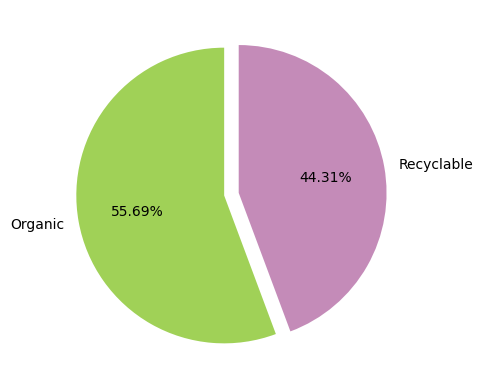

In [8]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors)
plt.show()

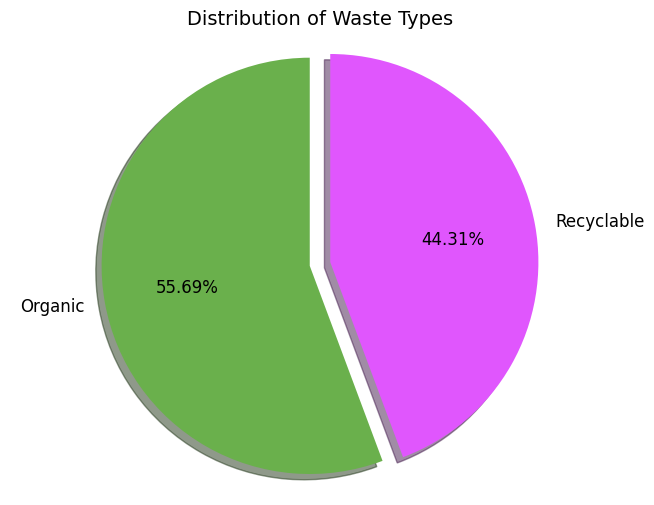

In [9]:
colors = ['#6ab04c', '#e056fd']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors=colors, shadow=True, textprops={'fontsize': 12})
plt.title('Distribution of Waste Types', fontsize=14)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

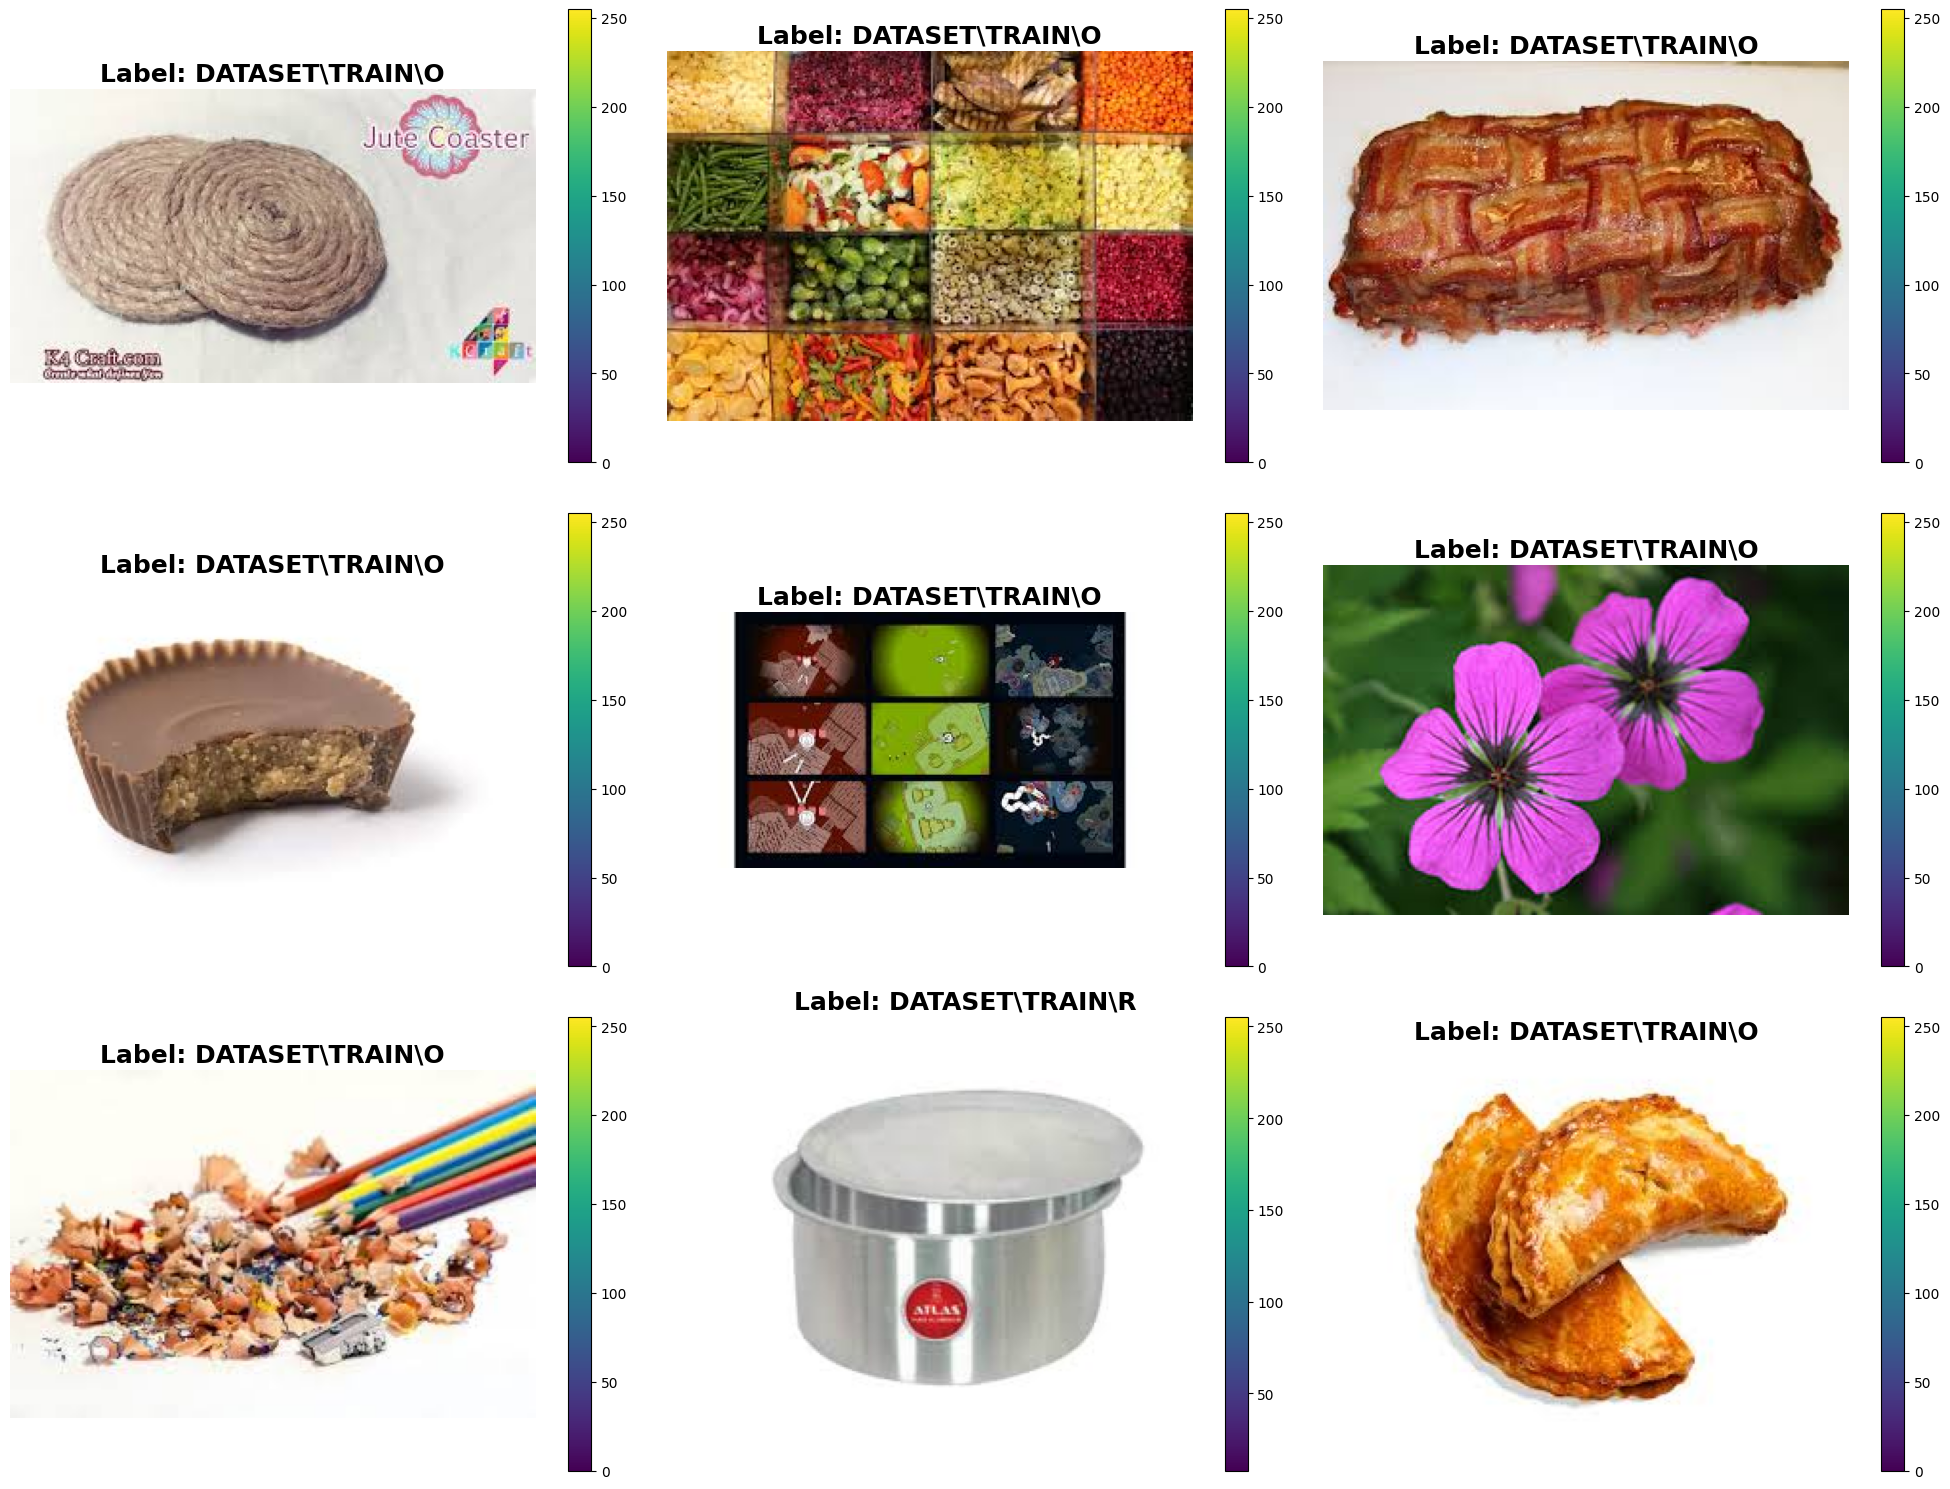

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar


# Assuming 'data' contains 'image' and 'label' attributes
num_images = 9  # Number of images to display
plt.figure(figsize=(20, 15))

# Dynamically determine rows and columns
rows = int(np.ceil(num_images / 3))
cols = 3222

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    index = np.random.randint(len(data.image))  # Ensure within valid range
    
    # Display the image with a title
    plt.imshow(data.image[index], cmap='gray')  # Add cmap if grayscale
    plt.title(f'Label: {data.label[index]}', fontdict={'size': 18, 'weight': 'bold'})
    im = plt.imshow(data.image[index], cmap='viridis')
    plt.colorbar(im)
    plt.axis('off')  # Turn off axis for a clean look

# Adjust layout once for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


## Convolutional Neural Network - CNN

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam

model = Sequential()

# First Convolution Block
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(MaxPooling2D())

# Second Convolution Block
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(MaxPooling2D())

# Third Convolution Block
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(MaxPooling2D())

# Flattening and Dense Layers
model.add(GlobalAveragePooling2D())  # Replaced Flatten with GlobalAveragePooling
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2))  # Change to number of classes
model.add(Activation("softmax"))  # Changed to softmax for multi-class classification

# Compile the model
model.compile(loss="categorical_crossentropy",  # Changed loss to categorical for multi-class classification
              optimizer=Adam(),
              metrics=["accuracy"])

# Learning Rate Scheduler (optional)
from keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=0.0001)

# Batch Size
batch_size = 256

# You can now train your model with lr_scheduler as a callback if needed.


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,746 (561.51 KB)

 Trainable params: 143,298 (559.76 KB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


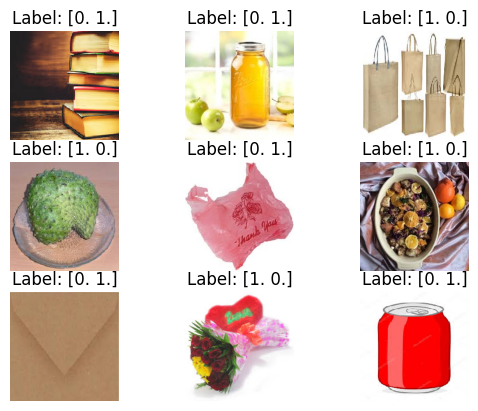

In [18]:
import matplotlib.pyplot as plt

sample_images, sample_labels = next(train_generator)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights (optional, if classes are imbalanced)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=0.00001),
    ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

# Train the model
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

hist = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,                      # Increased epochs for better convergence
    validation_data=test_generator,
    validation_steps=validation_steps,
    class_weight=class_weights_dict,  # Pass class weights (if applicable)
    callbacks=callbacks
)
